In [1]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [2]:
loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
Y = torch.tensor([0,1,1,0],dtype=torch.float32)


In [3]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()


        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2,1,bias=True)
    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [4]:
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size = batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)


XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


In [5]:
epochs = 10000
def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

for epoch in range(epochs):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'Epoch {epoch}/{epochs}, loss: {avg_loss}')


Epoch 0/10000, loss: 0.301132844761014
Epoch 1000/10000, loss: 0.27038102224469185
Epoch 2000/10000, loss: 0.27022553235292435
Epoch 3000/10000, loss: 0.26847536861896515
Epoch 4000/10000, loss: 0.26516806334257126
Epoch 5000/10000, loss: 0.22409657016396523
Epoch 6000/10000, loss: 0.0001402673997290549
Epoch 7000/10000, loss: 1.2700951401711791e-11
Epoch 8000/10000, loss: 3.2152058793144533e-12
Epoch 9000/10000, loss: 3.0020430585864233e-12


('linear1.weight', Parameter containing:
tensor([[-1.9767,  2.0750],
        [-3.0809,  3.3435]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.7012, -2.5002], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.6653,  2.7713]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([1.5715], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y is predicted = tensor([1.0000], device='cuda:0', grad_fn=<ViewBackward0>)


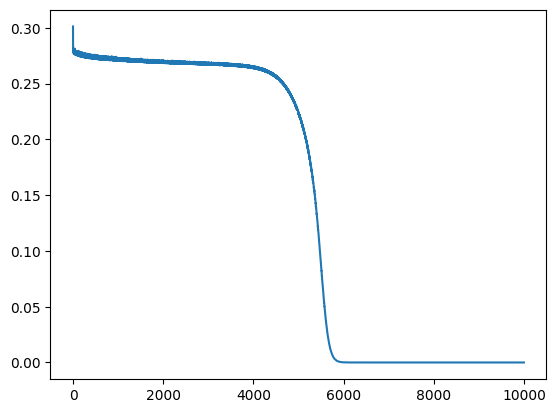

In [6]:
http://127.0.0.1:8000/for param in model.named_parameters():
    print(param)
input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print("The input is = {}".format(input))
print("Output y is predicted = {}".format(model(input)))
plt.plot(loss_list)
plt.show()

In [7]:
#Q2

In [8]:
loss_list = []
torch.manual_seed(42)
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]],dtype=torch.float32)
Y = torch.tensor([0,1,1,0],dtype=torch.float32)
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel,self).__init__()


        self.linear1 = nn.Linear(2,2,bias=True)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(2,1,bias=True)
    def forward(self,x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x
    def sigmoid(x):
        return 1.0/(1+torch.exp(-x))
       
        

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx].to(device), self.Y[idx].to(device)
full_dataset = MyDataset(X,Y)
batch_size = 1
train_data_loader = DataLoader(full_dataset, batch_size = batch_size, shuffle=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)



XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


Epoch 0/10000, loss: 0.28828215412795544
Epoch 1000/10000, loss: 0.13222978546400554
Epoch 2000/10000, loss: 0.13277034627981266
Epoch 3000/10000, loss: 0.13273568680347125
Epoch 4000/10000, loss: 0.13273096554848962
Epoch 5000/10000, loss: 0.1327835510719524
Epoch 6000/10000, loss: 0.1328371121908276
Epoch 7000/10000, loss: 0.13272638581878482
Epoch 8000/10000, loss: 0.13273535281267357
Epoch 9000/10000, loss: 0.1324844262948659
('linear1.weight', Parameter containing:
tensor([[ 0.6139,  0.6554],
        [-0.6774,  0.6844]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.6271, -0.0178], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-0.7764,  0.7782]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.4958], device='cuda:0', requires_grad=True))
The input is = tensor([0., 1.], device='cuda:0')
Output y is predicted = tensor([0.9926], device='cuda:0', grad_fn=<ViewBack

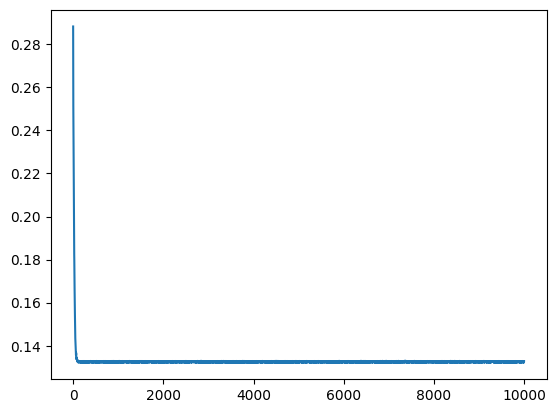

In [9]:

    As the forward computation is performed, the graph is implicitly defined.
    This graph has the advantage of being more adaptable. The library is less intrusive and enables interleaved graph generation and evaluation. The forward computation is implemented in your preferred programming language, complete with all of its features and algorithms. Debugging dynamic graphs is simple. Because it permits line-by-line execution of the code and access to all variables, finding bugs in your code is considerably easier. If you want to employ Deep Learning for any genuine purpose in the industry, this is a must-have feature.
    The disadvantage of employing this graph is that there is limited time for graph optimization, and the effort may be wasted if the graph does not change.
epochs = 10000
def train_one_epoch(epoch_index):
    totalloss = 0
    for i,data in enumerate(train_data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(),labels)
        loss.backward()
        optimizer.step()
        totalloss += loss.item()
    return totalloss/(len(train_data_loader)*batch_size)

for epoch in range(epochs):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch%1000 == 0:
        print(f'Epoch {epoch}/{epochs}, loss: {avg_loss}')
for param in model.named_parameters():
    print(param)
input = torch.tensor([0,1], dtype=torch.float32).to(device)
model.eval()
print("The input is = {}".format(input))
print("Output y is predicted = {}".format(model(input)))
plt.plot(loss_list)
plt.show()

Manually computed output for tensor([[0., 1.]]): tensor([[0.8017]])


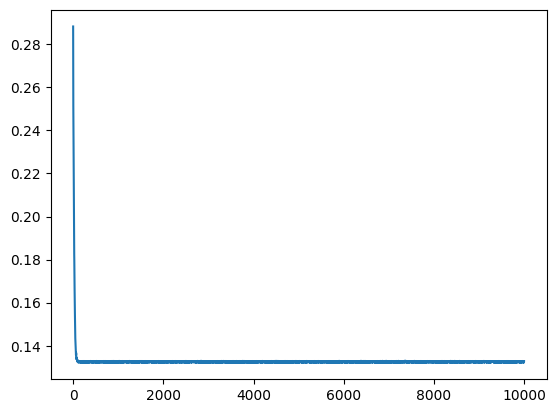

In [11]:
#Q3
import torch
import matplotlib.pyplot as plt 
import numpy as np
from torch import nn 

weight1 = torch.tensor([[1.0, -1.0], [2.0, -2.0]], dtype=torch.float32)
bias1 = torch.tensor([0.5, -0.5], dtype=torch.float32)
weight2 = torch.tensor([[1.0], [-1.0]], dtype=torch.float32)
bias2 = torch.tensor([0.5], dtype=torch.float32)


class XORModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=2, bias=True)
        self.linear1.weight.data = weight1
        self.linear1.bias.data = bias1
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(in_features=2, out_features=1, bias=True)
        self.linear2.weight.data = weight2
        self.linear2.bias.data = bias2
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x


X = torch.tensor([[0, 1]], dtype=torch.float32)
linear1_output = torch.matmul(X, weight1.t()) + bias1
activation_output = torch.sigmoid(linear1_output)
final_output = torch.matmul(activation_output, weight2) + bias2  # No need to transpose weight2
print(f"Manually computed output for {X}: {final_output}")
plt.plot(loss_list)
plt.show()

In [14]:
#Q4
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()



AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [15]:
#http://127.0.0.1:8000/# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')



Epoch [1/2], Step [100/600], Loss: 0.2708
Epoch [1/2], Step [200/600], Loss: 0.2518
Epoch [1/2], Step [300/600], Loss: 0.2982
Epoch [1/2], Step [400/600], Loss: 0.0863
Epoch [1/2], Step [500/600], Loss: 0.1519
Epoch [1/2], Step [600/600], Loss: 0.2795
Epoch [2/2], Step [100/600], Loss: 0.1378
Epoch [2/2], Step [200/600], Loss: 0.0869
Epoch [2/2], Step [300/600], Loss: 0.0924
Epoch [2/2], Step [400/600], Loss: 0.1764
Epoch [2/2], Step [500/600], Loss: 0.0803
Epoch [2/2], Step [600/600], Loss: 0.0981


In [16]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.74 %


Number of learnable parameters: 109386
Epoch [1/5], Loss: 0.39784829948407247
Epoch [2/5], Loss: 0.19123166217915474
Epoch [3/5], Loss: 0.1370663846145942
Epoch [4/5], Loss: 0.1142189361106382
Epoch [5/5], Loss: 0.09547872744552267
Accuracy on test set: 95.93%


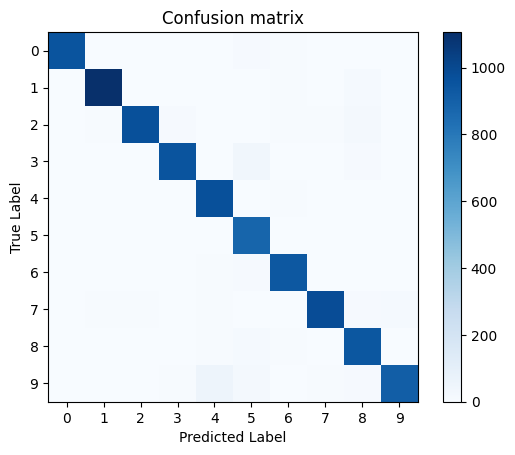

In [19]:
#Q4 Alt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define transforms to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize the tensor to range [-1, 1]
])

# Download MNIST dataset and create data loaders
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define neural network model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        x = torch.flatten(x, 1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = 28 * 28  # Size of MNIST images
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10  # Digits 0-9
model = FFNN(input_size, hidden_size1, hidden_size2, num_classes)

# Count the number of learnable parameters
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of learnable parameters:", num_params)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

# Evaluate the model
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        predicted_labels.extend(predicted.numpy())
        true_labels.extend(labels.numpy())

print(f"Accuracy on test set: {100 * correct / total:.2f}%")

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, np.arange(num_classes))
plt.yticks(tick_marks, np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
